In [1]:
#import python libraries
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
#select the tickers
tickers=['IBM','GOOG','AMZN']
tickers

['IBM', 'GOOG', 'AMZN']

In [ ]:
#selectionner la période

In [3]:
end_date=datetime.today()
end_date

datetime.datetime(2023, 11, 27, 14, 17, 2, 576955)

In [4]:
start_date=end_date - timedelta(days=2*365)
start_date

datetime.datetime(2021, 11, 27, 14, 17, 2, 576955)

In [5]:
#create a dataframe to store close prices
close_df=pd.DataFrame()

In [6]:
for ticker in tickers:
  data=yf.download(ticker,start=start_date,end=end_date)
  close_df[ticker]=data['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
#afficher les prix de cloture
close_df


,IBM,GOOG,AMZN
Date,,,
2021-11-29,118.500000,146.113998,178.078506
2021-11-30,117.099998,142.451996,175.353500
2021-12-01,116.919998,141.617996,172.186005
2021-12-02,116.900002,143.776505,171.867996
2021-12-03,118.839996,142.520493,169.489502
...,...,...,...
2023-11-17,152.889999,136.940002,145.179993
2023-11-20,154.350006,137.919998,146.130005
2023-11-21,153.910004,138.619995,143.899994


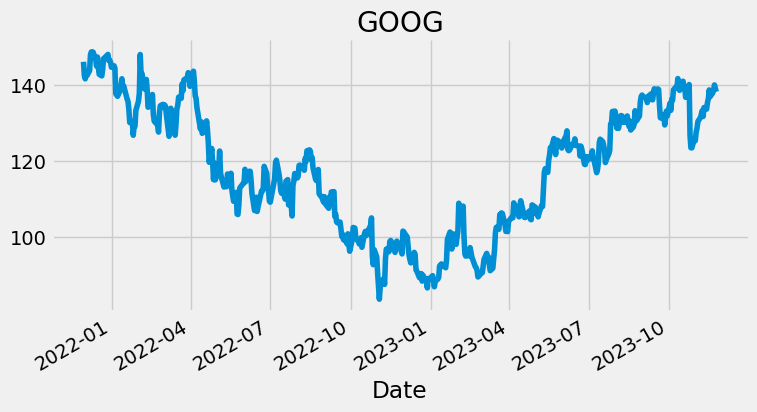

In [8]:
from matplotlib import pyplot as plt
close_df['GOOG'].plot(kind='line', figsize=(8, 4), title='GOOG')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
#calculer les rendements
returns=close_df.pct_change()
returns


,IBM,GOOG,AMZN
Date,,,
2021-11-29,NaN,NaN,NaN
2021-11-30,-0.011814,-0.025063,-0.015302
2021-12-01,-0.001537,-0.005855,-0.018063
2021-12-02,-0.000171,0.015242,-0.001847
2021-12-03,0.016595,-0.008736,-0.013839
...,...,...,...
2023-11-17,-0.001111,-0.012689,0.016453
2023-11-20,0.009549,0.007156,0.006544
2023-11-21,-0.002851,0.005075,-0.015260


In [35]:
#calculer le rendement moyen et la variance de chaque titre
mean_returns=np.mean(returns,axis=0)
mean_returns


IBM     0.000624
GOOG    0.000131
AMZN   -0.000026
dtype: float64

In [11]:
#presenter la matrice var-cov

cov_matrix=returns.cov()
cov_matrix

,IBM,GOOG,AMZN
IBM,0.000171,0.000085,0.000090
GOOG,0.000085,0.000483,0.000407
AMZN,0.000090,0.000407,0.000724


In [12]:
title='Portfolio Price History'
mes_actions=close_df

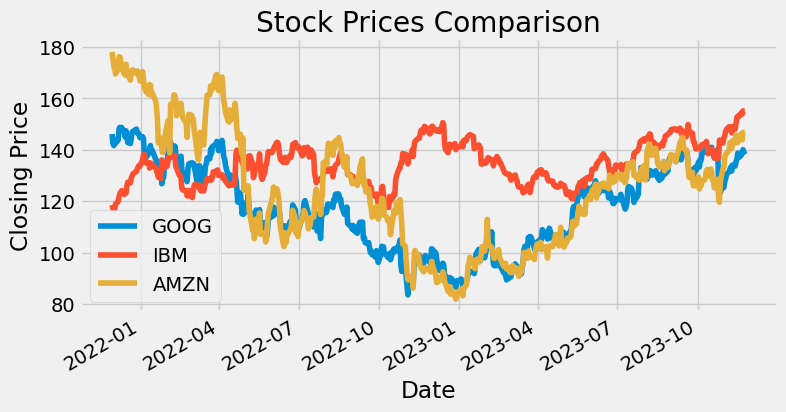

In [13]:
from matplotlib import pyplot as plt

# Assuming close_df is a DataFrame with columns 'GOOG', 'IBM', and 'AMZN'
close_df[['GOOG', 'IBM', 'AMZN']].plot(kind='line', figsize=(8, 4))
plt.title('Stock Prices Comparison')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(['GOOG', 'IBM', 'AMZN'])
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


In [14]:
#calculer les proportions
proportions=np.array([0.2,0.3,0.5])

In [15]:
#calculer la variance et l'écart type
portfolio_variance=np.dot(proportions.T, np.dot(cov_matrix,proportions))
portfolio_variance

0.0003815262438069281

In [16]:
portfolio_volatility=np.sqrt(portfolio_variance)
portfolio_volatility

0.019532696787871562

In [18]:
#calculer le rendement annuel du portefeuille
portfolio_annual_return=np.sum(returns.mean()*proportions)*252
portfolio_annual_return

0.03805217141510902

In [19]:
#afficher le rendement,la variance et la volatilité en %
percent_return=str(round(portfolio_annual_return,4)*100)+'%'
percent_variance=str(round(portfolio_variance,4)*100)+'%'
percent_volatility=str(round(portfolio_volatility,4)*100)+'%'
percent_annual_return=str(round(portfolio_annual_return,4)*100)+'%'

print('Le rendement moyen esperé du portefeuille est de:' + percent_return)
print('Le variance du portefeuille est de:' + percent_variance)
print('Le volatilté du portfeuille est de: ' + percent_volatility)
print('Le rendement annuel du portfeuil est de '+percent_annual_return)

Le rendement moyen esperé du portefeuille est de:3.81%
Le variance du portefeuille est de:0.04%
Le volatilté du portfeuille est de: 1.95%
Le rendement annuel du portfeuil est de 3.81%


In [20]:
pip install cvxpy #objectif minimiser la variance (G²P)

In [21]:
import cvxpy as cp

In [22]:
weights = cp.Variable(len(mean_return))
weights

Variable((3,))

In [23]:
objective=cp.Minimize(cp.quad_form(weights,cov_matrix)) #code pour minimiser la variance

In [24]:
constraints= [cp.sum(weights)==1]

In [25]:
problem=cp.Problem(objective,constraints)

In [ ]:
problem.solve()

0.0001561021216879461

In [26]:
optimal_weights=weights.value
print("optimal weights:",optimal_weights)

optimal weights: None


In [27]:
pip install fredapi

In [28]:
from fredapi import Fred
fred=Fred(api_key="fd56964a425884ac8b6314219efc5f26")
rate=fred.get_series_latest_release('GS10')/100
rf=rate.iloc[-1]
rf

0.048

In [29]:
sharpe_ratio=(portfolio_annual_return)/portfolio_volatility
sharpe_ratio

1.9481268679057546

In [30]:
num_portfolios = 10000

In [31]:
portfolio_returns = []
portfolio_volatilities= []

In [36]:
for _ in range(num_portfolios):
  weights = np.random.rand(len(tickers))
  weights /= np.sum(weights)
  portfolio_return = np.dot(mean_returns,weights)
  portfolio_volatility = np.sqrt(np.dot(weights.T , np.dot(cov_matrix,weights)))
  portfolio_returns.append(portfolio_return)
  portfolio_volatilities.append(portfolio_volatility)


In [ ]:
#convertir les rendements en un tableau Numpy

In [37]:
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities=np.array(portfolio_volatilities)

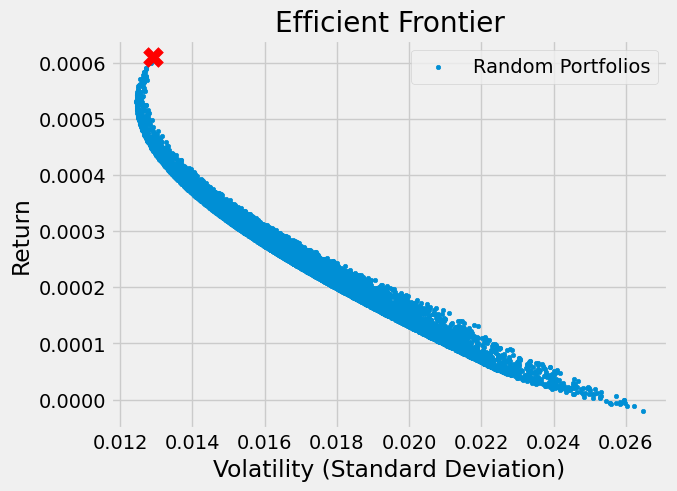

In [40]:
plt.scatter(portfolio_volatilities, portfolio_returns, marker ='o',s=10, label='Random Portfolios')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
sharpe_ratios = portfolio_returns / portfolio_volatilities
max_sharpe_ratio_index = np.argmax(sharpe_ratios)
plt.scatter(portfolio_volatilities[max_sharpe_ratio_index],
            portfolio_returns[max_sharpe_ratio_index],
            marker ='X', color ='red', s=200,label='Max Sharpe Ratio')
plt.show()
